# Статистика, DS-поток
## Задание SP.8

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.



**Баллы за задание:**

* Задача 1 &mdash;  100 баллов
* Задача 2 &mdash;  120 баллов
* Задача 3 &mdash;  80 баллов

**Важность задач:**

* *высокая:* задачи 1-3.

<font color="red">**Напоминание**. В задачах могут быть "скрытые" критерии, то есть "заказчик" хочет что-то, что явно не указал в условии. Если вы внимательно следите за удобством восприятия информации в вашем решении, учитываете советы по оформлению и отрабатываете замечания проверяющих, вам не составит труда выполнить эти критерии.</font>

<b><font size="5">Дорешка:</font></b>

* <b><font size="4">Задача 5</font></b>
  * <b><font color="#00b565" size="3">Увеличил количество экспериментов</font></b>

* <b><font size="4">Задача 1</font></b>
  * <b><font color="#00b565" size="3">Исправил значение alpha</font></b>
  * <b><font color="#00b565" size="3">Построил больше графиков</font></b>

* <b><font size="4">Задача 2</font></b>
  * <b><font color="#00b565" size="3">Добавил комментариев к 1-му пункту</font></b>
  * <b><font color="#00b565" size="3">Добавил комментариев ко 2-му пункту</font></b>
  * <b><font color="#00b565" size="3">Сделал вывод о выборке во втором пункте</font></b>
  * <b><font color="#00b565" size="3">Добавил вывод в 3-м пункте</font></b>

In [1]:
# Bot check

# HW_ID: ds_sp8
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsRegressor

from statsmodels.nonparametric.kernel_regression import KernelReg

sns.set(style="whitegrid", font_scale=1.3, palette="Set2")

---
### Задача 5.

Рассмотрим задачу регрессии. Мы уже научились оценивать зависимость $y(x)$, но это только точечная оценка для каждого конкретного $x$. На практике бывает необходимо строить доверительные интервалы, которые в совокупности образуют доверительные ленты. Поскольку мы ничего не знаем про распределение ошибок, будем строить доверительную ленту по методу бутстрепа.

1. Сгенерируем достаточно большое число бутстрепных выборок.

2. Обучим модели и получим значения $\widehat{y}(x)$, для всех значений $x$ по сетке значений.

3. По предсказаным значениям оценим верхнюю и нижнюю границы ленты с помощью методов построения бутстрепных доверительных интервалов.

Напишите функцию, которая реализует данный метод

In [3]:

def bootstrap_confidence_interval(
    X, Y, model, X_grid, bootstrap_count=None, alpha=0.95, model_args=None
):
    '''
    Построение предсказательной ленты для модели регрессии.
    
    X, Y - выборка;
    model - класс модели;
    X_grid - сетка для доверительной ленты;
    alpha - уровень доверия;
    bootstrap_count - количество бутстрепных выборок;
    model_args - параметры модели.
    '''
    
    bootstrap_count = bootstrap_count or X.shape[0]
    predictions = []

    for _ in tqdm(range(bootstrap_count)):
        try:
            # Генерация бутстрепной выборки и обучение модели
            X_bootstrap, Y_bootstrap = resample(X, Y)
            model_instance = model(**model_args) if model_args else model()
            model_instance.fit(X_bootstrap, Y_bootstrap)

            # Предсказания для X_grid
            predictions.append(model_instance.predict(X_grid))
        
        except (LinAlgError, ZeroDivisionError):
            continue

    # Вычисляем доверительные интервалы
    lower_bound = np.percentile(predictions, (1 - alpha) / 2 * 100, axis=0)
    upper_bound = np.percentile(predictions, (1 + alpha) / 2 * 100, axis=0)
    
    return lower_bound, upper_bound

Рассмотрим датасет cps71 из семинара

In [4]:
data = pd.read_csv('cps71.csv', index_col=0)
data.dropna(inplace=True)
data.head()

,logwage,age
1,11.1563,21
2,12.8131,22
3,13.0960,22
4,11.6952,22
5,11.5327,22


Разделим нашу выборку на обучающую и тестовую

In [5]:
X = data['age'].values.reshape(-1, 1)
y = data['logwage'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Постройте доверительные ленты для моделей линейной регрессии, ядерной регрессии и KNN-регрессии.
Изобразите на графике также предсказания каждой модели и обучающую выборку.

*Примечание: для классов из statmodels сигнатура класса может не совпадать со стандартной, поэтому сделайте для этих классов, класс-обертку, который в себе просто будет вызывать нужные методы.*

In [6]:
class LinearRegression:
    def __init__(self, alpha=0):
        self.model = Ridge(alpha=alpha)

    def fit(self, X, y):
        self.model.fit(X, y)
        return self.model

    def predict(self, X):
        return self.model.predict(X)


class KernelRegressionWrapper:
    def __init__(self, bw=[0.3]):
        self.model = None
        self.bw = bw

    def fit(self, X, y):
        self.model = KernelReg(endog=y, exog=X, var_type="c", bw=self.bw)

    def predict(self, X):
        pred, _ = self.model.fit(X.squeeze())
        return pred

<b><font color="#00b565" size="5">Увеличил количество экспериментов</font></b>

<b><font color="#00b565" size="3">Замечание: </font></b>Взято мало экспериментов без уточнения получаемой точности. Комм. хотя бы 1000. 


In [7]:
X_grid = np.linspace(X_train.min(), X_train.max(), 1000).reshape(-1, 1)

lower_kernel, upper_kernel = bootstrap_confidence_interval(
    X_train, y_train, KernelRegressionWrapper, X_test, bootstrap_count=1000
)
lower_linreg, upper_linreg = bootstrap_confidence_interval(
    X_train, y_train, LinearRegression, X_test, bootstrap_count=1000
)
lower_knn, upper_knn = bootstrap_confidence_interval(
    X_train, y_train,KNeighborsRegressor, X_test, bootstrap_count=1000
)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

<b><font color="#00b565" size="5">Конец исправлений</font></b>


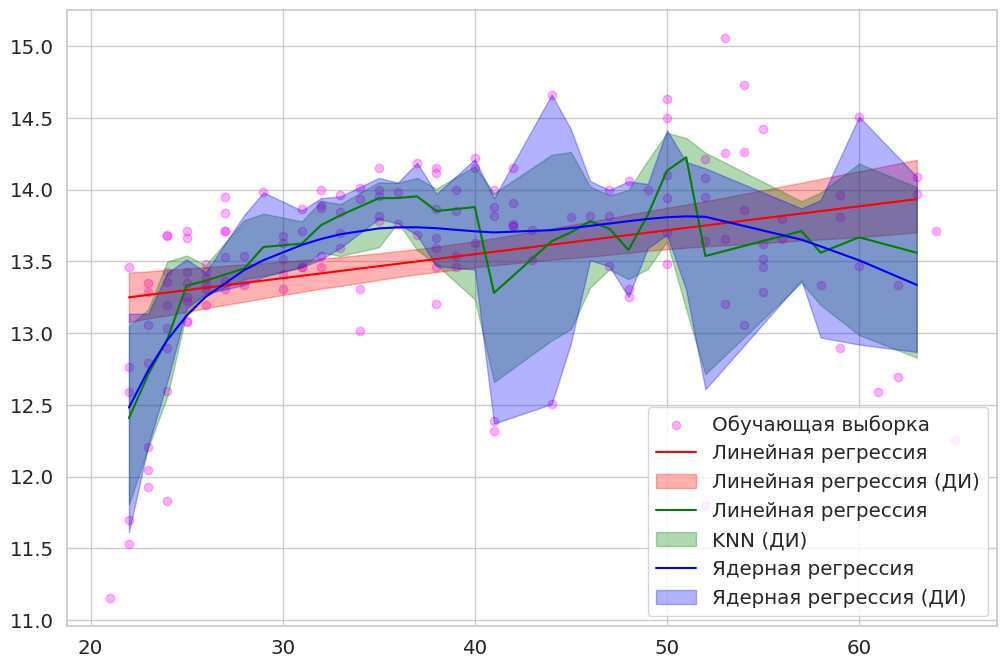

In [8]:
plt.figure(figsize=(12, 8))

plt.scatter(X_train, y_train, color="magenta", alpha=0.3, label="Обучающая выборка")

# Линейная регрессия
linreg_model = LinearRegression().fit(X_train, y_train)
sorted_idx = np.argsort(X_test.squeeze())
plt.plot(
    X_test[sorted_idx],
    linreg_model.predict(X_test[sorted_idx]),
    ls="-",
    color="red",
    label="Линейная регрессия",
)
plt.fill_between(
    X_test.squeeze()[sorted_idx],
    lower_linreg[sorted_idx].reshape(-1),
    upper_linreg[sorted_idx].reshape(-1),
    color="red",
    alpha=0.3,
    label="Линейная регрессия (ДИ)",
)
# KNN
knn_model = KNeighborsRegressor().fit(X_train, y_train)
sorted_idx = np.argsort(X_test.squeeze())
plt.plot(
    X_test[sorted_idx],
    knn_model.predict(X_test[sorted_idx]),
    ls="-",
    color="green",
    label="Линейная регрессия",
)
plt.fill_between(
    X_test.squeeze()[sorted_idx],
    lower_knn[sorted_idx].reshape(-1),
    upper_knn[sorted_idx].reshape(-1),
    color="green",
    alpha=0.3,
    label="KNN (ДИ)",
)

# Ядерная регрессия
kernel_reg = KernelRegressionWrapper(bw="cv_ls")
kernel_reg.fit(X_train, y_train)
sorted_idx = np.argsort(X_test.squeeze())
plt.plot(
    X_test[sorted_idx],
    kernel_reg.predict(X_test[sorted_idx]),
    color="blue",
    label="Ядерная регрессия",
    ls="-",
)
plt.fill_between(
    X_test.squeeze()[sorted_idx],
    lower_kernel[sorted_idx].reshape(-1),
    upper_kernel[sorted_idx].reshape(-1),
    color="blue",
    alpha=0.3,
    label="Ядерная регрессия (ДИ)",
)

plt.legend()
plt.show()

Сделайте выводы

**Вывод:**

Как видим, ДИ для KNN и ядерной регрессии действительно покрывают значительное количество точек, что может говорить о корректной реализации предложенного алгоритма, а также то, что данные способы аппроксимации хорошо отражают природу данных.

Видим, что линейная регрессия плохо аппрокисимируют данный датасете, вследствие чего покрытие ДИ явно не соответсует заявленному уровню доверия.

_____
### Задача 1.

В одной известной компании поставлена задача построения нейросети для распознавания котиков и песиков. Для построения такого бинарного классификатора собрана коллекция изображений со сбалансированными классами.

Прошел месяц работы аналитиков и ML-разработчиков, и, наконец-то, нейросеть обучена и готова к использованию. Но руководство хочет убедится, что месяц работы прошел не зря, и построенная нейросеть действительно дает результат.
Как известно, случайный классификатор, выдающий для каждого объекта случайный класс, угадывает ответ правильно с вероятностью $1/2$. И руководству будет достаточно, если модель будет работать лучше. Однако, как их убедить в том, что та же точность 60% действительно отличается от 50%, а не вызвана чистой случайностью? На помощь приходит проверка статистических гипотез &mdash; вы можете проверить статистическую значимость отклонения от базовой точности 50%, и предъявить ее в качестве доказательства.

Сформулируем задачу на математическом языке. Пусть $X_1, ..., X_n \sim Bern(p)$ &mdash; результаты работы модели на тестовой выборке, где $X_i = 1$, если для $i$-го объекта модель правильно определила класс, а $p$ &mdash; неизвестная вероятность такого события.
Мы хотим проверить гипотезу $\mathsf{H}_0\colon p=1/2$ против альтернативы $\mathsf{H}_1\colon p>1/2$. Нулевая гипотеза означает, что построенный классификатор выдает рандомный ответ, а первая &mdash; что чаще все же выдает верный ответ.

На семинаре получено, что $S = \left\{T(x) \geqslant c_\alpha\right\}$, где $T(X) = \sum\limits_{i=1}^n X_i$, является равномерно наиболее мощным критерием для проверки этих гипотез.
Чему при этом равно $c_\alpha$? Учтите, что распределение дискретное, и строгий/нестрогий знак имеет значение.

$T(X) \sim Binom(n, \theta)$
$c_\alpha: P_{\theta_0}(T(X) > c_{\alpha_0}) = \alpha_0$ и 

$\alpha_0 - \min: \alpha_0 > \alpha$

Значит $c_\alpha$ -- $(1 - \alpha)$-квантиль Binom($n, \theta_0$)

Проверьте, что критерий работает.
Возьмите несколько значений $n$ и реализаций статистики $T(X)$.
В каждом случае найдите значение $c_\alpha$, а также выведите результат процедуры проверки гипотез 0/1 &mdash; отвергается ли $\mathsf{H}_0$ (выводите 1, если отвергается).
Оформите это в виде таблицы, можно через `pandas.DataFrame`.

*Замечание:* Пользуйтесь функциями из `scipy.stats`.

<b><font color="#00b565" size="5">Исправил значение alpha</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> Неправильное значение c_alpha. Комм. u_(1-alpha)+1, потому что распределение дискретное, а в критерии указан нестрогий знак.


In [9]:
alpha = 0.05
n_values = np.sort(np.random.randint(10, 100, 10))
p = 0.5

T_values = np.random.binomial(n = n_values, p = p)
c_alpha = sps.binom.ppf(1 - alpha, n=n_values, p=0.5) + 1

info_df = pd.DataFrame({
    'n': n_values,
    'T(X)': T_values,
    'c_alpha': c_alpha,
    'H_0 reject': (T_values > c_alpha).astype(int)
})

print(fr"Проверка гипотезы H_0 при p = {p}")
info_df

Проверка гипотезы H_0 при p = 0.5


,n,T(X),c_alpha,H_0 reject
0,10,6,9.0,0
1,47,20,30.0,0
2,49,19,31.0,0
3,59,28,37.0,0
4,60,30,37.0,0
5,64,36,40.0,0
6,80,42,48.0,0
7,86,44,52.0,0
8,87,49,52.0,0
9,94,51,56.0,0


<b><font color="#00b565" size="5">Конец исправлений</font></b>


Как видим, гипотеза $H_0$ почти всегда овергается, при $p \not = \frac{1}{2}$

Теперь для некоторых $n$ постройте графики функции мощности критерия при $1/2 < p < 1$ и уровне значимости 0.05. Сравните их.

Формула мощности имеет вид
$$
\beta_S(p) = 1 - F_p(c_\alpha)
$$

<b><font color="#00b565" size="5">Построил больше графиков</font></b>

<b><font color="#00b565" size="5">Замечание: </font></b> График мощности построен для трех и менее значений n. Комм. Стоило взять достаточное количество размеров выборки, чтобы понять закономерности.


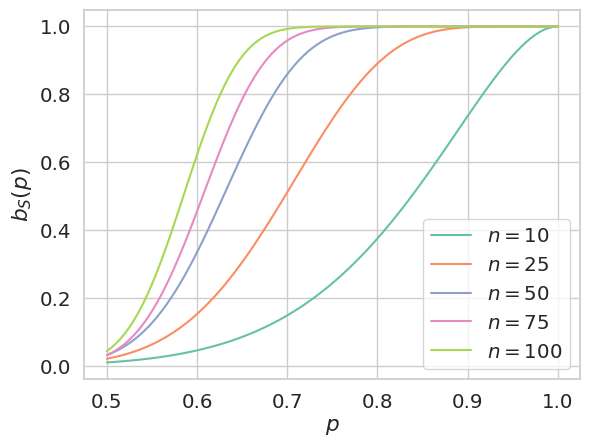

In [10]:
alpha = 0.05
p = np.linspace(0.5, 1, 100)
n_values = (10, 25, 50, 75, 100)

for n in n_values:
    c_alpha_0 = sps.binom.ppf(1 - alpha, n, 1/2)
    if 1 - sps.binom.cdf(c_alpha_0, n, 1/2) > alpha:
        c_alpha_0 += 1
    F_p = lambda p: sps.binom.cdf(c_alpha_0, n, p)
    b_S = 1 - F_p(p)

    plt.plot(p, b_S, label = fr'$n = {n}$')

plt.xlabel(r'$p$')
plt.ylabel(r'$b_S(p)$')
plt.legend()
plt.show()

<b><font color="#00b565" size="5">Конец исправлений</font></b>


**Вывод:** 

Как видим с увеличением размера выборки, мощность начинает быстрее стремится к единице при $p \rightarrow 1$. Это связано с тем, что при увеличении n у нас оказывается все больше точек справа от $\theta_0$, а значит функция распределения уменьшается $\Rightarrow$ мощность увеличивается, что мы и наблюдаем на графике.


_____
### Задача 2.

На практике часто рассматривают асимптотические критерии, например, критерий Вальда. Такие критерии контролируют вероятность ошибки I рода на уровне $\alpha$ только в пределе, однако для небольших выборок она может сильно отличаться от $\alpha$, причем не редко в большую сторону. Поэтому для таких критериев возникает необходимость в вычислении значения вероятности ошибки I рода при конечной выборке.

Зачастую посчитать точное значение вероятности ошибки I рода довольно сложно, поэтому вместо него вычисляют оценку с помощью семплирования по методу Монте-Карло.

Пусть гипотеза $\mathsf{H}_0$ простая, то есть $\mathsf{H}_0\colon \mathsf{P} = \mathsf{P}_0$. Для ее проверки по конечной выборке $X_1, ..., X_n$ используется критерий $S$. **Опишите схему оценки вероятности ошибки I рода** критерия $S$ методом Монте-Карло.

1. Сгенерируем m выборок $(Y_1,..., Y_m)$ размера n из $P_0$.

2. $P(I_S) = \frac{1}{m} \sum\limits_{i=1}^m I(Y_i \in S)$

Если гипотеза $\mathsf{H}_0$ сложная, то есть $\mathsf{H}_0\colon \mathsf{P} \in \mathscr{P}_0$, то можно повторить такую процедуру несколько раз для разных $\mathsf{P} \in \mathscr{P}_0$.

Рассмотрим альтернативную гипотезу $\mathsf{H}_1\colon \mathsf{P} \in \mathscr{P}_1$. **Опишите схему оценки мощности** критерия $S$ методом Монте-Карло.

Возьмем произвольное $P \in \mathscr{P}_1$

1. Генерируем m выборок $(Y_1, ..., Y_m)$ размера n из P.

2. $\beta_S(P) = \frac{1}{m} \sum\limits_{i=1}^m I(Y_i \in S)$

Пусть $X_1, ..., X_n$ &mdash; выборка из пуассоновского распределения с параметром $\theta$. Рассмотрим гипотезы $\mathsf{H}_0\colon \theta = 1\ \ vs.\ \ \mathsf{H}_1\colon \theta \not= 1$ и критерий Вальда для их проверки.

**1.** **Оцените вероятности ошибки I рода** критерия для размеров выборки $1 \leqslant n \leqslant 50$ и визуализируйте полученную зависимость.

$X_1 \sim Pois(\theta)$

Из семинара: $\hat{\theta} = \overline{X}$ -- а.н.о. с а.д. $\theta$

$\hat{\sigma}^2 = \overline{X}$ -- состоятельная оценка $\sigma^2$

$W(X) = \sqrt{n} \frac{\overline{X} - \theta_0}{\sqrt{\overline{X}}} \rightarrow{d_{\theta_0}} N(0, 1)$

Тогда критерий Вальда имеет вид $S = \{|W(X)| \geq z_{1 - \frac{\alpha}{2}}\}$

In [11]:
n_values = np.arange(1, 51, 1)

alpha = 0.05
z_alpha = sps.norm.ppf(1 - alpha / 2)

theta_0 = 1
m = 1000

In [12]:
def W_pois(Y, theta_0):
    W = np.sqrt(Y.shape[1]) * (Y.mean(axis=1) - theta_0) / np.sqrt(Y.mean(axis=1) + 1e-10)
    return W

def two_sided_hypothesis(W, alpha):
    z_alpha = sps.norm.ppf(1 - alpha / 2)
    return np.abs(W) >= z_alpha

def left_sided_hypothesis(W, alpha):
    z_alpha = sps.norm.ppf(alpha)
    return W <= z_alpha

def right_sided_hypothesis(W, alpha):
    z_alpha = sps.norm.ppf(1 - alpha)
    return W >= z_alpha

def get_prob_by_MK(Y, theta_0, criteria, W_func, alpha=0.05):
    W = W_func(Y, theta_0)
    I_S = np.mean(criteria(W, alpha))
    return I_S

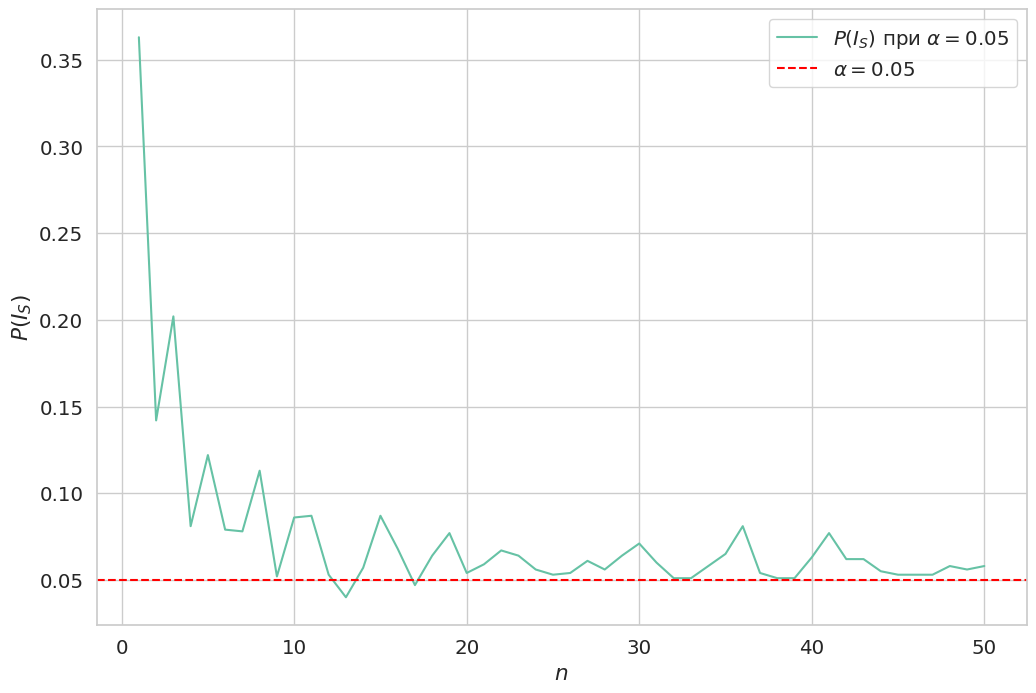

In [13]:
P_values = []
for n in n_values:
    Y = np.random.poisson(theta_0, size=(m, n))
    P_values.append(get_prob_by_MK(Y, theta_0, two_sided_hypothesis, W_pois, alpha))
plt.figure(figsize=(12, 8))

plt.plot(n_values, P_values, label=rf"$P(I_S)$ при $\alpha = {alpha}$")
plt.axhline(alpha, color="red", linestyle="--", label=rf"$\alpha = {alpha}$")
plt.xlabel(r"$n$")
plt.ylabel(r"$P(I_S)$")
plt.legend()
plt.show()

<b><font color="#00b565" size="5">Добавил комментариев к 1-му пункту</font></b>

<b><font color="#00b565" size="3">Замечание: </font></b>В пункте 1 ничего не сказано, что при малых n вероятность ошибки I рода сильно больше порога. 


Заметим, что при малых n вероятность ошибки первого рода сильно больше порога.

<b><font color="#00b565" size="5">Конец исправлений</font></b>


**Вывод:** Как видим, с увеличением n ошибка супремум ошибки первого рода монотонно убывает, что согласуется с определением критерием Вальда асимтотического уровня доверия $\alpha$

**2.** Для значений $n \in \{5, 15, 50\}$ **оцените функцию мощности критерия** для значений $\theta \in (0, 5)$ по сетке с шагом 0.01 по методу Монте-Карло. Визуализируйте полученные зависимости.

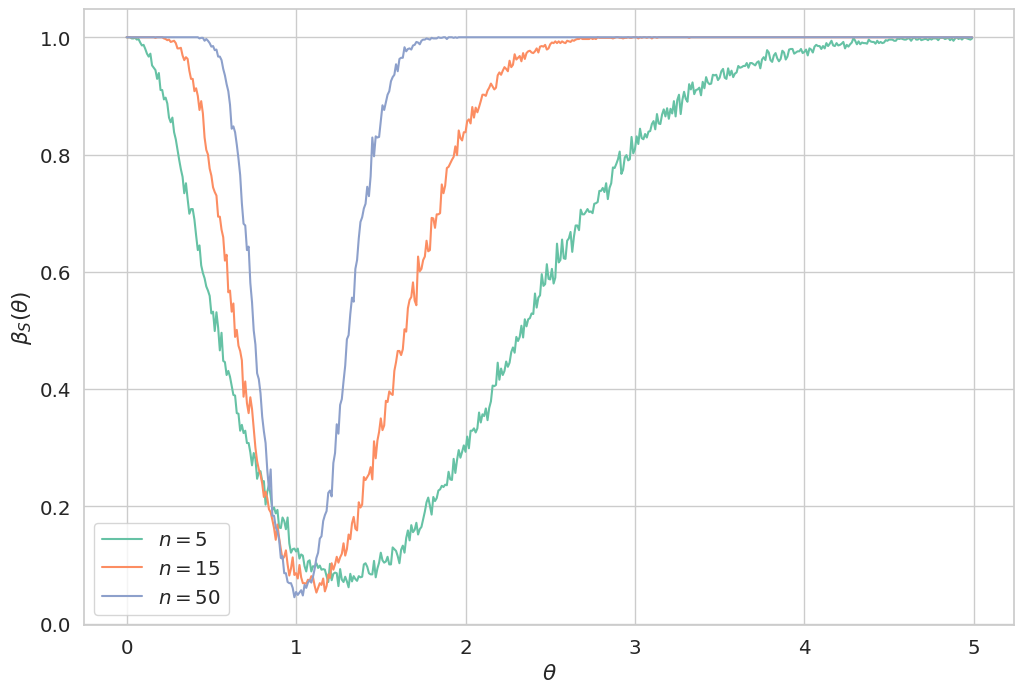

In [14]:
n_values = [5, 15, 50]
theta_values = np.arange(0, 5, 0.01)
m = 1000

powers = {5: [], 15: [], 50: []}
for n in n_values:
    for theta in theta_values:
        Y = np.random.poisson(theta, size=(m, n))
        powers[n].append(get_prob_by_MK(Y, theta_0, two_sided_hypothesis, W_pois, alpha))

plt.figure(figsize=(12, 8))

for n in n_values:
    plt.plot(theta_values, powers[n], label=rf"$n = {n}$")

plt.xlabel(r"$\theta$")
plt.ylabel(r"$\beta_S(\theta)$")
plt.legend()
plt.show()

<b><font color="#00b565" size="5">Добавил комментариев ко 2-му пункту</font></b>

<b><font color="#00b565" size="5">Замечание: </font></b> В п.2 ничего не сказано о зависимости мощности от n.


Заметим, что с увеличением n мощность критерия также увеличивается, то есть он начинает лучше отвергать гипотезу при близких с истинному значению $\theta$

<b><font color="#00b565" size="5">Конец исправлений</font></b>


<b><font color="#00b565" size="5">Сделал вывод о выборке во втором пункте</font></b>

<b><font color="#00b565" size="3">Замечание: </font></b> Не сказано, что при увеличении выборки мощность увеличивается. 


<b><font color="#00b565" size="5">Конец исправлений</font></b>


Заметим, что при увеличении n мощность критерия увеличивается

**Вывод:** Как видим, при полученном критерии, полученный график мощности, согласуется с тем, что мы получили на лекции. То есть график подтверждает то, что при двусторонней гипотезе мы имеем уход мощности к 1 при $\theta \rightarrow -\infty$ и $\theta \rightarrow \infty$, а минимум мощности достигается в $\theta_0$.

**3.** Пусть $n=50$. **Сравните мощности критериев**, соответствующих двусторонней, левосторонней и правосторонней альтернативам.

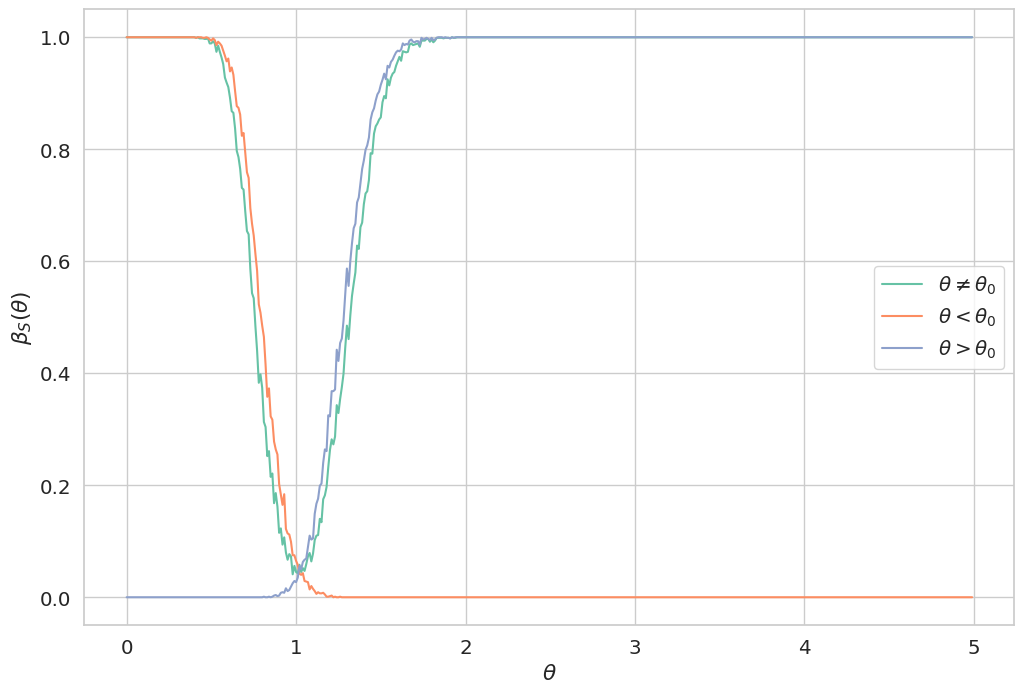

In [15]:
n = 50

powers = {r"$\theta \neq \theta_0$": [], r"$\theta < \theta_0$": [], r"$\theta > \theta_0$": []}
for theta in theta_values:
    Y = np.random.poisson(theta, size=(m, n))
    powers[r"$\theta \neq \theta_0$"].append(get_prob_by_MK(Y, theta_0, two_sided_hypothesis, W_pois, alpha))
    powers[r"$\theta < \theta_0$"].append(get_prob_by_MK(Y, theta_0, left_sided_hypothesis, W_pois, alpha))
    powers[r"$\theta > \theta_0$"].append(get_prob_by_MK(Y, theta_0, right_sided_hypothesis, W_pois, alpha))

plt.figure(figsize=(12, 8))

for key in powers:
    plt.plot(theta_values, powers[key], label=rf"{key}")

plt.xlabel(r"$\theta$")
plt.ylabel(r"$\beta_S(\theta)$")
plt.legend()
plt.show()

<b><font color="#00b565" size="5">Добавил вывод в 3-м пункте</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> Нет развернутого вывода в п.3.


Вывод:
Критерий Вальда демонстрирует следующие особенности:
* Двусторонняя альтернатива эффективна по обе стороны от истинного значения параметра, но уступает по мощности левосторонней для $\theta$, меньших истинного значения, и правосторонней — для больших $\theta$;

* Для левосторонней альтернативы мощность равна нулю при $\theta$, превышающих истинное значение. Аналогично, для правосторонней альтернативы мощность равна нулю при $\theta$, меньших истинного значения.

<b><font color="#00b565" size="5">Конец исправлений</font></b>

**Вопрос на подумать.** Сколько семплирований в методе Монте-Карло нужно сделать, чтобы оценить вероятности ошибки I рода с точностью до 0.001? Иначе говоря, значения (0.049, 0.051) можно принять за 0.05.

_____
### Задача 3.

Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\Gamma(\theta, \beta)$. Рассмотрим основную гипотезу $\mathsf{H}_0\colon \theta = 2$.

**1.** Пусть $\beta$ неизвестно. Для размеров выборки $n \in \{5, 15, 30, 50, 100\}$ **оцените вероятности ошибки I рода** критерия Вальда для двусторонней альтернативы в зависимости от истинных значений $\beta$. Визуализируйте полученные зависимости.

In [16]:
def W_gamma(Y, theta_0):
    var = Y.var(axis=1)
    estimation_theta = Y.mean(axis=1) / var
    estimation_var = 2 * (estimation_theta)**2 + 3 / var
    W = np.sqrt(n) * (estimation_theta - theta_0) / np.sqrt(estimation_var)
    return W

In [17]:
theta_0 = 2
n_values = {5: [], 15: [], 30: [], 50: [], 100: []}
beta_values = np.linspace(0.1, 10, 100)
m = 10000

alpha = 0.05

In [18]:
for n in n_values:
    for beta in beta_values:
        Y = sps.gamma.rvs(a=beta, scale=1/theta_0, size=(m, n))
        n_values[n].append(get_prob_by_MK(Y, theta_0, two_sided_hypothesis, W_gamma, alpha))

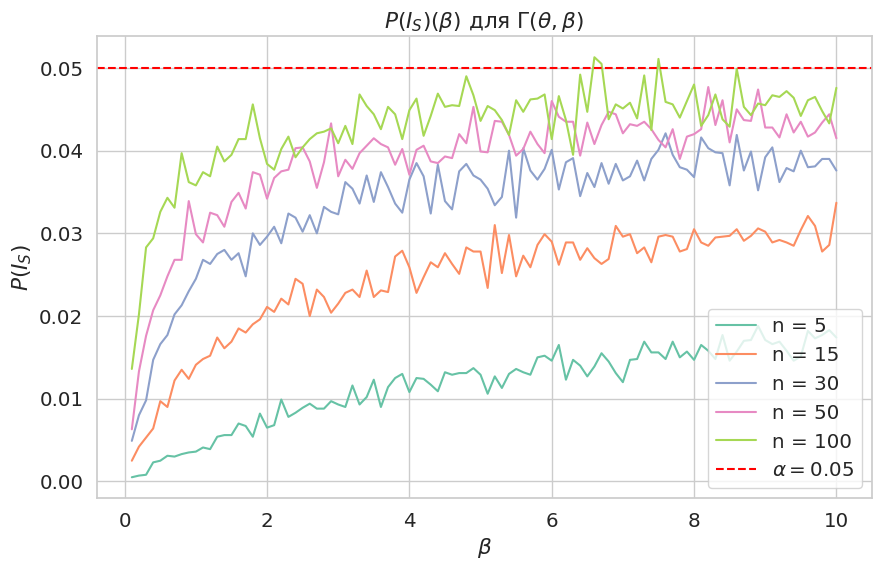

In [19]:
plt.figure(figsize=(10, 6))

for i, n in enumerate(n_values.keys()):
    plt.plot(beta_values, n_values[n], label=f"n = {n}")

plt.axhline(alpha, color="red", linestyle="--", label=rf"$\alpha = {alpha}$")

plt.xlabel(r"$\beta$")
plt.ylabel(r"$P(I_S)$")
plt.title(r"$P(I_S)(\beta)$ для $\Gamma(\theta, \beta)$")
plt.legend()
plt.grid(True)
plt.show()

**Вывод:** Как видим, при увеличении $\beta$ растет вероятность ошибки первого рода, тем не менее мы видим, что вероятность не превсоходит заданного раннее уровня доврия. Заметим, что чем больше выборка, тем быстрее растет вероятность ошибки первого рода.

**2.** Пусть $\beta$ известно. **Сравните по мощности** РНМК и критерий Вальда (*для известной $\beta$*) для левосторонней и правосторонней альтернатив, а также двусторонней альтернативы для критерия Вальда.

Из ST.8 №8 

1. $H_0: \theta = \theta_0$

   $H_1: \theta < \theta_0$

Тогда РНМК $S = \{T(X) > c_1 \}$, где $c_1 - (1 - \alpha)$ - квантиль $\Gamma(n\theta_0, \beta)$

$\beta_S(P) = 1 - F_\theta(c_1)$, где $F_\theta$ -- функция распределения $\Gamma(n\theta, \beta)$

2. $H_0: \theta = \theta_0$

   $H_1: \theta > \theta_0$

Тогда РНМК $S = \{T(X) < c_2 \}$, где $c_1 - \alpha$ - квантиль $\Gamma(n\theta_0, \beta)$

$\beta_S(P) = F_\theta(c_2)$, где $F_\theta$ -- функция распределения $\Gamma(n\theta, \beta)$


In [20]:
beta = 1
theta_0 = 2
n = 50
alpha = 0.05
m = 10000

theta_values = np.linspace(0.1, 5, 100)

In [21]:
def T(X):
    return np.sum(X, axis=1)

def UMP_left_hypothesis(Y, theta_0, beta, alpha):
    T_Y = T(Y)
    n = Y.shape[1]
    c_1 = sps.gamma.ppf(1 - alpha, a=n * beta, scale=1/theta_0)
    return np.mean(T_Y >= c_1, axis=0)

def UMP_right_hypothesis(Y, theta_0, beta, alpha):
    T_Y = T(Y)
    n = Y.shape[1]
    c_2 = sps.gamma.ppf(alpha, a=n * beta, scale=1/theta_0)
    return np.mean(T_Y <= c_2, axis=0)


In [22]:
left_power_compared = {"UMP": [], "Wald": []}
right_power_compared = {"UMP": [], "Wald": []}
two_sided_power_compared = {"UMP": [], "Wald": []}

for theta in theta_values:
    Y = sps.gamma.rvs(a=beta, scale=1/theta, size=(m, n))
    left_power_compared["UMP"].append(UMP_left_hypothesis(Y, theta_0, beta, alpha))
    left_power_compared["Wald"].append(get_prob_by_MK(Y, theta_0, left_sided_hypothesis, W_gamma, alpha))
    
    right_power_compared["UMP"].append(UMP_right_hypothesis(Y, theta_0, beta, alpha))
    right_power_compared["Wald"].append(get_prob_by_MK(Y, theta_0, right_sided_hypothesis, W_gamma, alpha))

    two_sided_power_compared["Wald"].append(get_prob_by_MK(Y, theta_0, two_sided_hypothesis, W_gamma, alpha))

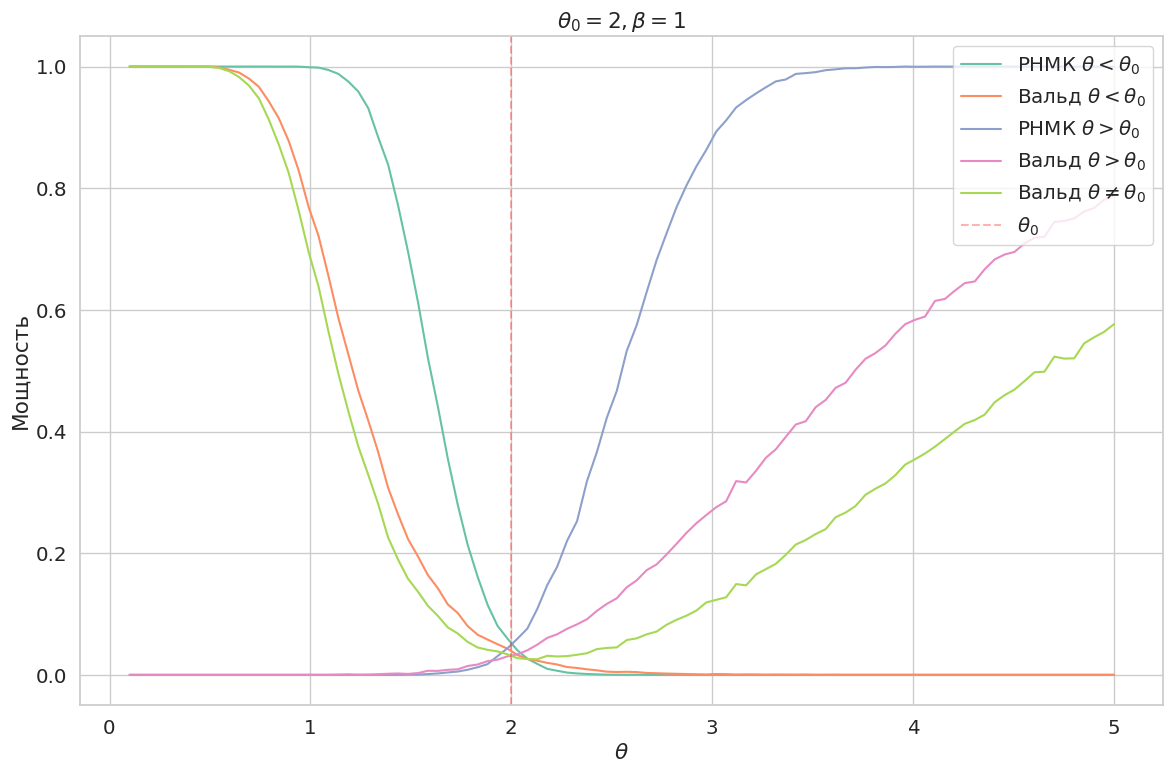

In [23]:
plt.figure(figsize=(12, 8))

plt.plot(theta_values, left_power_compared["UMP"], label=r"РНМК $\theta < \theta_0$")
plt.plot(theta_values, left_power_compared["Wald"], label=r"Вальд $\theta < \theta_0$")
plt.plot(theta_values, right_power_compared["UMP"], label=r"РНМК $\theta > \theta_0$")
plt.plot(theta_values, right_power_compared["Wald"], label=r"Вальд $\theta > \theta_0$")
plt.plot(theta_values, two_sided_power_compared["Wald"], label=r"Вальд $\theta \neq \theta_0$")

plt.axvline(x=theta_0, color='r', linestyle='--', alpha=0.3, label=r"$\theta_0$")
plt.grid(True)
plt.xlabel(r"$\theta$")
plt.ylabel("Мощность")
plt.title(r"$\theta_0 = 2, \beta = 1$")
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()



**Вывод:** Как видим, левосторонний (правосторонний) РНМК имеет мощность больше, чем левосторонний(правосторонний) критерий Вальда, что согласуется с оперделением РНМК.

Видим, что для мощностей обоих РНМК существует участок, на котором мощность двустороннего критерия Вальда будет больше. Отсюда делаем вывод, что не существует РНМК для двусторонней гипотезы.